<a href="https://colab.research.google.com/github/justaguyalways/Mine-The-Model-hackathon-Celesta/blob/main/Mine_the_model_Celesta_final_mv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import Data
train_data = pd.read_csv('/content/drive/MyDrive/Mine The Model/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Mine The Model/test.csv')

In [ ]:
train_data = train_data.dropna().reset_index()

In [ ]:
train_data.describe()

,level_0,index,rooms,retail_price,sqft,toilets,image_id
count,8061.000000,8061.000000,8061.000000,8.061000e+03,8061.000000,8061.000000,8061.000000
mean,4199.221561,6022.461605,3.487160,6.749126e+05,2161.360253,2.452115,6022.461605
std,2421.870515,3471.169482,1.028377,3.908494e+05,1050.197925,0.943090,3471.169482
min,0.000000,0.000000,1.000000,1.950000e+05,280.000000,0.000000,0.000000
25%,2104.000000,3011.000000,3.000000,3.990000e+05,1386.000000,2.000000,3011.000000
50%,4201.000000,6088.000000,3.000000,5.850000e+05,1915.000000,2.100000,6088.000000
75%,6288.000000,9032.000000,4.000000,7.995000e+05,2760.000000,3.000000,9032.000000
max,8399.000000,11999.000000,10.000000,2.000000e+06,11183.000000,8.100000,11999.000000


**Creating another DataFrame to convert city in some variable**

In [ ]:
city_df = train_data[['city','retail_price']]

In [ ]:
df = city_df.groupby(["city"]).size().reset_index(name='Count')

In [ ]:
avg_price = []
avg_price_persq = []
for j in range(len(df)):
  price = 0
  price_persq = 0
  for i in range(len(city_df)):
    if df['city'][j] == city_df['city'][i]:
        price = price + city_df['retail_price'][i]
        price_persq += train_data['retail_price'][i]/train_data['sqft'][i]
  average_price = price/df['Count'][j]
  average_price_persq = price_persq/df['Count'][j]
  avg_price.append(average_price)
  avg_price_persq.append(average_price_persq)

In [ ]:
df['avg_price'] = avg_price
df['avg_price_persq'] = avg_price_persq

df = df.sort_values(by = ['avg_price_persq']).reset_index()

In [ ]:
df

,index,city,Count,avg_price,avg_price_persq
0,24,"Barstow, CA",3,2.106287e+05,116.561584
1,51,"California City, CA",15,2.466946e+05,128.111376
2,263,"Ridgecrest, CA",1,3.399000e+05,130.329755
3,2,"Adelanto, CA",20,2.657440e+05,146.608704
4,300,"Stallion Springs, CA",1,3.449000e+05,149.826238
...,...,...,...,...,...
346,31,"Beverly Hills, CA",4,1.585750e+06,1053.506319
347,295,"Solana Beach, CA",8,1.455250e+06,1092.788996
348,98,"El Segundo, CA",2,1.648640e+06,1102.251656
349,287,"Santa Monica, CA",1,1.450000e+06,1362.781955


In [ ]:
train_data

,level_0,index,rooms,retail_price,address,city,sqft,toilets,image_id
0,0,5832,2.0,299000,81913 Calle Torbellino,"Indio, CA",1295.0,2.0,5832
1,1,5584,3.0,299000,26076 Fiesta Place,"Hemet, CA",1566.0,2.0,5584
2,2,9408,5.0,499990,34450 Fawn Ridge Place,"Yucaipa, CA",3068.0,3.0,9408
3,3,4644,4.0,849900,26481 Montebello Place,"Mission Viejo, CA",2230.0,2.1,4644
4,4,5739,3.0,333490,2562 Red Spruce Lane,"San Jacinto, CA",1898.0,2.0,5739
...,...,...,...,...,...,...,...,...,...
8056,8395,792,4.0,289990,45228 Lorimer Avenue,"Lancaster, CA",1498.0,2.0,792
8057,8396,10671,4.0,895000,265 Old Toll Road,"Lake Arrowhead, CA",2981.0,3.0,10671
8058,8397,11650,3.0,479900,5925 Balmoral Dr,"San Diego, CA",1272.0,1.0,11650
8059,8398,2134,4.0,599000,28137 Stonington Lane,"Saugus, CA",1924.0,3.0,2134


**Here we create a dict which takes the key as city and the value as average area per sqft**


In [ ]:

lst2 = list(df['city'])
dict_sqft = dict.fromkeys(lst2,1)

In [ ]:
i = 0
for key in dict_sqft:
  dict_sqft[key] = df['avg_price_persq'][i]
  i+=1

In [ ]:
dict_sqft

{'Barstow, CA': 116.56158431631808,
 'California City, CA': 128.11137553844438,
 'Ridgecrest, CA': 130.329754601227,
 'Adelanto, CA': 146.60870421747362,
 'Stallion Springs, CA': 149.8262380538662,
 'Calexico, CA': 150.53554390885802,
 'Victorville, CA': 152.36829997993237,
 'Salton City, CA': 152.45314578605525,
 'Romoland, CA': 153.78945441230317,
 'Helendale, CA': 156.3137224237774,
 'Lebec, CA': 157.54387611369512,
 'Apple Valley, CA': 161.58321786316301,
 'Pearblossom, CA': 161.79686460995558,
 'Landers, CA': 162.96694782976414,
 'Arvin, CA': 165.9474595728573,
 'Boron, CA': 166.11111111111111,
 'Pinon Hills, CA': 166.7166017448332,
 'Morongo Valley, CA': 166.73077322559794,
 'Thousand Palms, CA': 167.5776990185387,
 'Rosamond, CA': 167.79195339423597,
 'Llano, CA': 168.02728979155216,
 'Bakersfield, CA': 168.88170004564725,
 'Phelan, CA': 170.9474830297575,
 'Borrego Springs, CA': 173.80976995750365,
 '29 Palms, CA': 175.53411393285413,
 'Warner Springs, CA': 176.85199890065516,


In [ ]:
lst_city = list(df['city'])
dict_count = dict.fromkeys(lst_city,1)

In [ ]:
i = 0
for key in dict_count:
  dict_count[key] = i+1
  i+=1

In [ ]:
dict_count

{'Barstow, CA': 1,
 'California City, CA': 2,
 'Ridgecrest, CA': 3,
 'Adelanto, CA': 4,
 'Stallion Springs, CA': 5,
 'Calexico, CA': 6,
 'Victorville, CA': 7,
 'Salton City, CA': 8,
 'Romoland, CA': 9,
 'Helendale, CA': 10,
 'Lebec, CA': 11,
 'Apple Valley, CA': 12,
 'Pearblossom, CA': 13,
 'Landers, CA': 14,
 'Arvin, CA': 15,
 'Boron, CA': 16,
 'Pinon Hills, CA': 17,
 'Morongo Valley, CA': 18,
 'Thousand Palms, CA': 19,
 'Rosamond, CA': 20,
 'Llano, CA': 21,
 'Bakersfield, CA': 22,
 'Phelan, CA': 23,
 'Borrego Springs, CA': 24,
 '29 Palms, CA': 25,
 'Warner Springs, CA': 26,
 'Juniper Hills, CA': 27,
 'Cabazon, CA': 28,
 'Rimforest, CA': 29,
 'Whitewater, CA': 30,
 'Oak Hills, CA': 31,
 'Pine Mountain Club, CA': 32,
 'Beaumont, CA': 33,
 'Sun City, CA': 34,
 'Calimesa, CA': 35,
 'Tehachapi, CA': 36,
 'Anza, CA': 37,
 'Frazier Park, CA': 38,
 'Coachella, CA': 39,
 'Desert Hot Springs, CA': 40,
 'Lancaster, CA': 41,
 'Mojave, CA': 42,
 'Yucca Valley, CA': 43,
 'Lake Los Angeles, CA': 44

In [ ]:
train_data

,level_0,index,rooms,retail_price,address,city,sqft,toilets,image_id
0,0,5832,2.0,299000,81913 Calle Torbellino,"Indio, CA",1295.0,2.0,5832
1,1,5584,3.0,299000,26076 Fiesta Place,"Hemet, CA",1566.0,2.0,5584
2,2,9408,5.0,499990,34450 Fawn Ridge Place,"Yucaipa, CA",3068.0,3.0,9408
3,3,4644,4.0,849900,26481 Montebello Place,"Mission Viejo, CA",2230.0,2.1,4644
4,4,5739,3.0,333490,2562 Red Spruce Lane,"San Jacinto, CA",1898.0,2.0,5739
...,...,...,...,...,...,...,...,...,...
8056,8395,792,4.0,289990,45228 Lorimer Avenue,"Lancaster, CA",1498.0,2.0,792
8057,8396,10671,4.0,895000,265 Old Toll Road,"Lake Arrowhead, CA",2981.0,3.0,10671
8058,8397,11650,3.0,479900,5925 Balmoral Dr,"San Diego, CA",1272.0,1.0,11650
8059,8398,2134,4.0,599000,28137 Stonington Lane,"Saugus, CA",1924.0,3.0,2134


In [ ]:
# Arranging the city values in the training dataset
avg_price_fromsq = [1 for i in range(len(train_data))]
train_data['Avg_price_persqft'] = avg_price_fromsq
train_data['city_no'] = avg_price_fromsq
for i in range(len(train_data)):
  if train_data['city'][i] in dict_sqft.keys():
      train_data['city_no'][i] = dict_count[train_data['city'][i]]
      train_data['Avg_price_persqft'][i] = (train_data['sqft'][i])*(dict_sqft[train_data['city'][i]])

<ipython-input-19-bb953c67e6a3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['city_no'][i] = dict_count[train_data['city'][i]]
<ipython-input-19-bb953c67e6a3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Avg_price_persqft'][i] = (train_data['sqft'][i])*(dict_sqft[train_data['city'][i]])


In [ ]:
dict_sqft['San Diego, CA']

507.25125244588236

In [ ]:
train_data

,level_0,index,rooms,retail_price,address,city,sqft,toilets,image_id,Avg_price_persqft,city_no
0,0,5832,2.0,299000,81913 Calle Torbellino,"Indio, CA",1295.0,2.0,5832,293668,70
1,1,5584,3.0,299000,26076 Fiesta Place,"Hemet, CA",1566.0,2.0,5584,343287,65
2,2,9408,5.0,499990,34450 Fawn Ridge Place,"Yucaipa, CA",3068.0,3.0,9408,692015,69
3,3,4644,4.0,849900,26481 Montebello Place,"Mission Viejo, CA",2230.0,2.1,4644,970195,244
4,4,5739,3.0,333490,2562 Red Spruce Lane,"San Jacinto, CA",1898.0,2.0,5739,373971,46
...,...,...,...,...,...,...,...,...,...,...,...
8056,8395,792,4.0,289990,45228 Lorimer Avenue,"Lancaster, CA",1498.0,2.0,792,284313,41
8057,8396,10671,4.0,895000,265 Old Toll Road,"Lake Arrowhead, CA",2981.0,3.0,10671,866673,119
8058,8397,11650,3.0,479900,5925 Balmoral Dr,"San Diego, CA",1272.0,1.0,11650,645223,282
8059,8398,2134,4.0,599000,28137 Stonington Lane,"Saugus, CA",1924.0,3.0,2134,588839,134


In [ ]:
x = np.array(list(dict_sqft.values())).mean()
x

390.94574534734846

In [ ]:
# Arranging the city values in the test dataset
avg_price_fromsq = [1 for i in range(len(test_data))]
test_data['Avg_price_persqft'] = avg_price_fromsq
test_data['city_no'] = avg_price_fromsq

for i in range(len(test_data)):
  if test_data['city'][i] in dict_count:
    test_data['city_no'][i] = dict_count[test_data['city'][i]]
    test_data['Avg_price_persqft'][i] = (test_data['sqft'][i])*(dict_sqft[test_data['city'][i]])
    
  else: ##Filling mean price per sqft for cities that were not in training data
    test_data['city_no'][i] = len(dict_count)/2
    test_data['Avg_price_persqft'][i] = x*(test_data['sqft'][i])

<ipython-input-23-21da14bd9590>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['city_no'][i] = dict_count[test_data['city'][i]]
<ipython-input-23-21da14bd9590>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Avg_price_persqft'][i] = (test_data['sqft'][i])*(dict_sqft[test_data['city'][i]])
<ipython-input-23-21da14bd9590>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['city_no'][i] = len(dict_count)/2

In [ ]:
test_data

,index,rooms,address,city,sqft,toilets,image_id,Avg_price_persqft,city_no
0,3076,3,33171 Sea Lion Drive,"Dana Point, CA",1510,2.0,3076,773440,285
1,3218,4,33 Segovia,"San Clemente, CA",2342,3.0,3218,1114970,264
2,9213,2,1074 TAMARACK Road,"Pinon Hills, CA",2845,3.0,9213,474308,17
3,10018,4,10989 Coalinga Avenue,"Montclair, CA",2379,3.0,10018,795324,153
4,11355,4,1128 Custer,"Campo, CA",1836,3.0,11355,436439,82
...,...,...,...,...,...,...,...,...,...
3596,9421,4,14603 Baylor Avenue,"Chino, CA",2092,2.1,9421,579161,113
3597,219,3,2301 Woodland Drive,"Pine Mountain Club, CA",2000,2.1,219,364258,32
3598,10333,5,5771 Jasper Street,"Alta Loma, CA",3002,3.1,10333,937042,140
3599,2814,3,4490 Lincoln Avenue,"Los Angeles, CA",1811,3.1,2814,1026554,305


In [ ]:
train_data = train_data.drop('level_0',axis = 1)
train_data = train_data.drop('city',axis = 1)
train_data = train_data.drop('address',axis = 1)
train_data

,index,rooms,retail_price,sqft,toilets,image_id,Avg_price_persqft,city_no
0,5832,2.0,299000,1295.0,2.0,5832,293668,70
1,5584,3.0,299000,1566.0,2.0,5584,343287,65
2,9408,5.0,499990,3068.0,3.0,9408,692015,69
3,4644,4.0,849900,2230.0,2.1,4644,970195,244
4,5739,3.0,333490,1898.0,2.0,5739,373971,46
...,...,...,...,...,...,...,...,...
8056,792,4.0,289990,1498.0,2.0,792,284313,41
8057,10671,4.0,895000,2981.0,3.0,10671,866673,119
8058,11650,3.0,479900,1272.0,1.0,11650,645223,282
8059,2134,4.0,599000,1924.0,3.0,2134,588839,134


### **Plotting Graphs and Checking Outliers**

index
rooms
retail_price
sqft
toilets
image_id
Avg_price_persqft
city_no


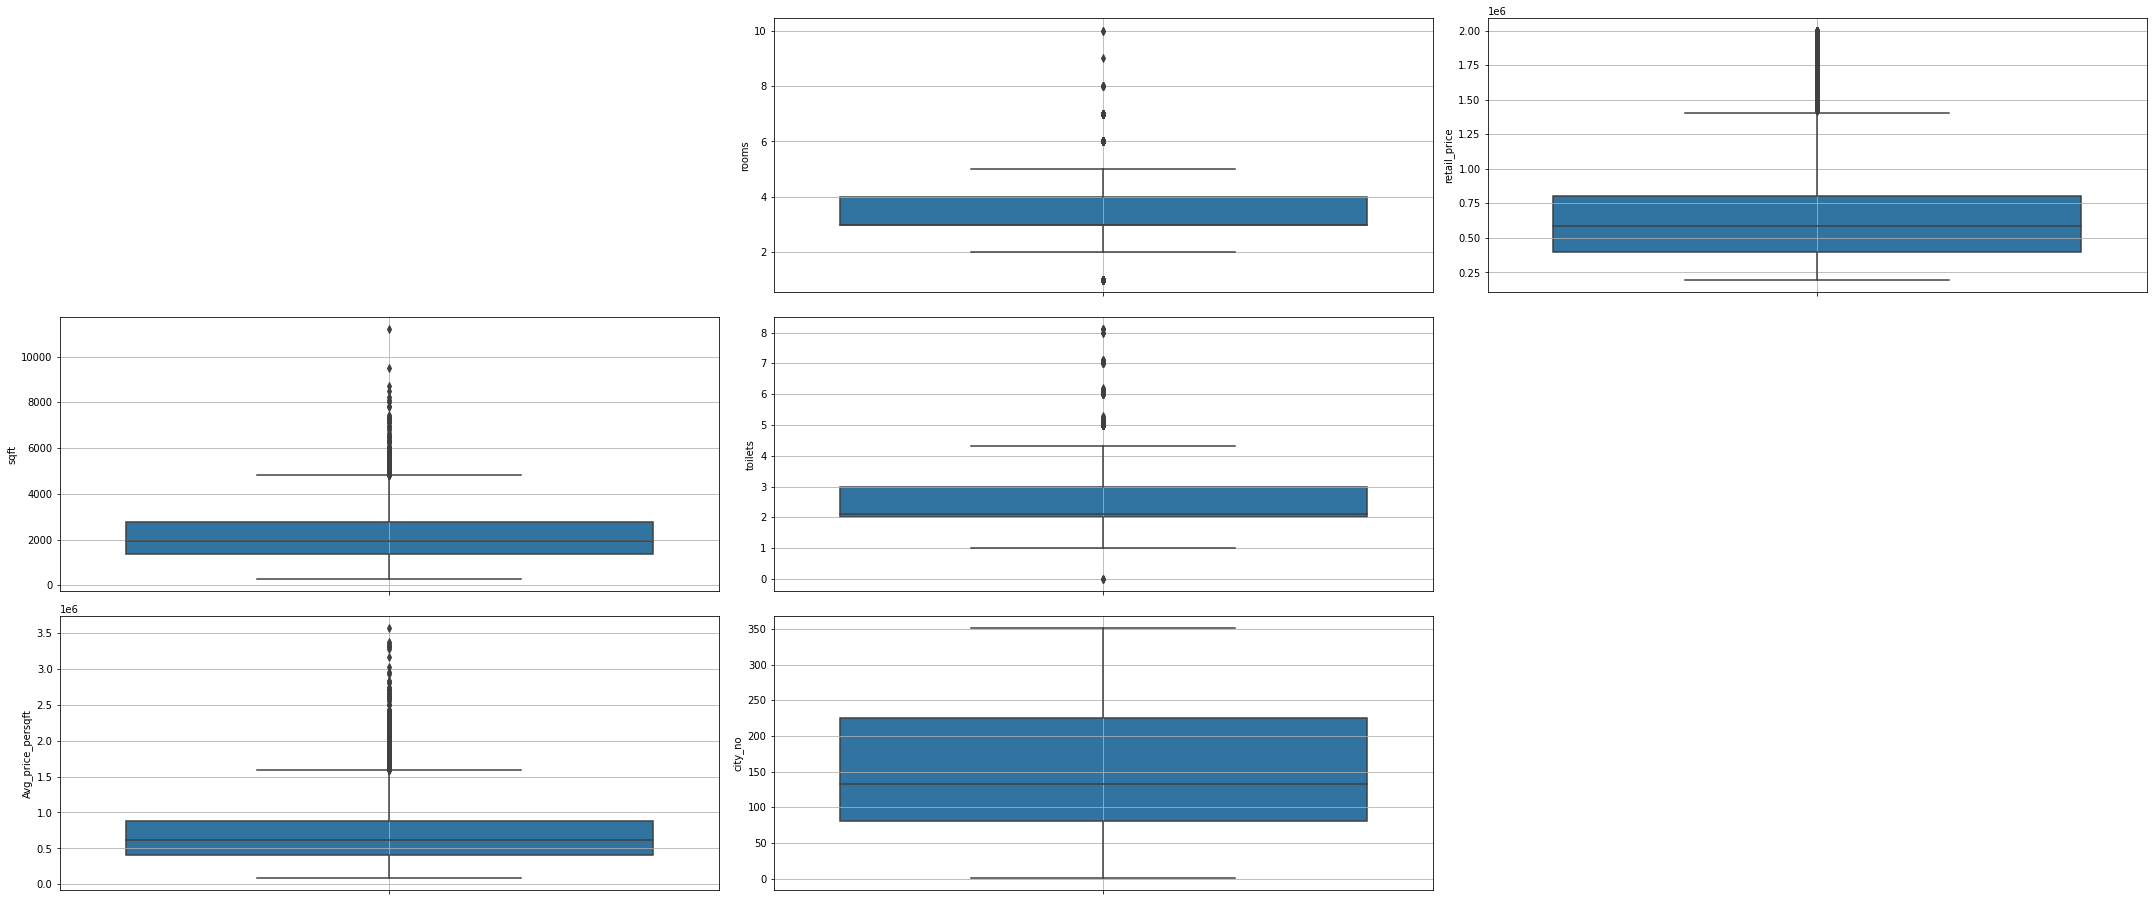

In [ ]:
# Check outliers 
fig = plt.figure(figsize=(30,25))
for index,col in enumerate(train_data):
  print(col)
  if(col in ["index","image_id","address"]):
    continue
  plt.subplot(6,3,index+1)
  sns.boxplot(y=col, data=train_data.dropna())
  plt.grid()
fig.tight_layout(pad=1.0)

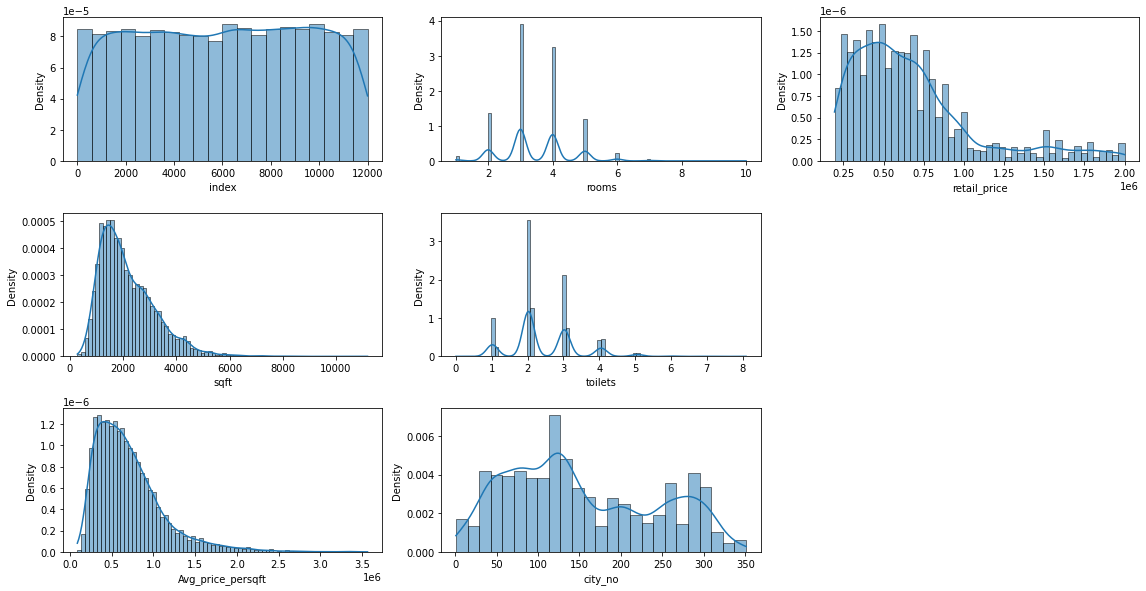

In [ ]:
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(train_data):
    if(col in [ "city", "image_id","address"]):
      continue
    plt.subplot(6,3,index+1)
    sns.histplot(train_data.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
    
fig.tight_layout(pad=1.0);

In [ ]:
train_data.dtypes

index                  int64
rooms                float64
retail_price           int64
sqft                 float64
toilets              float64
image_id               int64
Avg_price_persqft      int64
city_no                int64
dtype: object

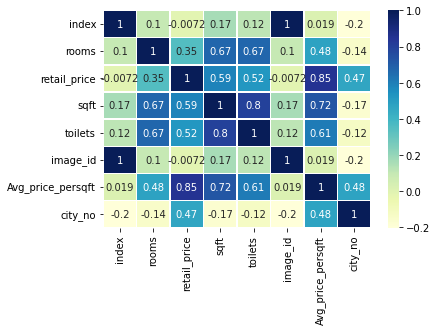

In [ ]:
correl = train_data.corr()
sns.heatmap(correl, cmap = 'YlGnBu', annot= True, linewidths=.5);

**Poornash write why we dropped the luxury part**

In [ ]:
#Dropping irrelevant data
train_data = train_data.drop('image_id',axis = 1)

In [ ]:
train_data

,index,rooms,retail_price,sqft,toilets,Avg_price_persqft,city_no
0,5832,2.0,299000,1295.0,2.0,293668,70
1,5584,3.0,299000,1566.0,2.0,343287,65
2,9408,5.0,499990,3068.0,3.0,692015,69
3,4644,4.0,849900,2230.0,2.1,970195,244
4,5739,3.0,333490,1898.0,2.0,373971,46
...,...,...,...,...,...,...,...
8056,792,4.0,289990,1498.0,2.0,284313,41
8057,10671,4.0,895000,2981.0,3.0,866673,119
8058,11650,3.0,479900,1272.0,1.0,645223,282
8059,2134,4.0,599000,1924.0,3.0,588839,134


In [ ]:
test_data = test_data.drop('image_id',axis = 1)
test_data = test_data.drop('address',axis = 1)
test_data = test_data.drop('city',axis = 1)
testindex = test_data['index']
test_data

,index,rooms,sqft,toilets,Avg_price_persqft,city_no
0,3076,3,1510,2.0,773440,285
1,3218,4,2342,3.0,1114970,264
2,9213,2,2845,3.0,474308,17
3,10018,4,2379,3.0,795324,153
4,11355,4,1836,3.0,436439,82
...,...,...,...,...,...,...
3596,9421,4,2092,2.1,579161,113
3597,219,3,2000,2.1,364258,32
3598,10333,5,3002,3.1,937042,140
3599,2814,3,1811,3.1,1026554,305


In [ ]:
y = train_data['retail_price'].values

X = train_data.drop('retail_price',axis = 1)
X = X.drop('index',axis = 1)

X_test = test_data.drop('index',axis = 1)
X

,rooms,sqft,toilets,Avg_price_persqft,city_no
0,2.0,1295.0,2.0,293668,70
1,3.0,1566.0,2.0,343287,65
2,5.0,3068.0,3.0,692015,69
3,4.0,2230.0,2.1,970195,244
4,3.0,1898.0,2.0,373971,46
...,...,...,...,...,...
8056,4.0,1498.0,2.0,284313,41
8057,4.0,2981.0,3.0,866673,119
8058,3.0,1272.0,1.0,645223,282
8059,4.0,1924.0,3.0,588839,134


In [ ]:
y

array([299000, 299000, 499990, ..., 479900, 599000, 549900])

In [ ]:
X.columns

Index(['rooms', 'sqft', 'toilets', 'Avg_price_persqft', 'city_no'], dtype='object')

In [ ]:
X_test

,rooms,sqft,toilets,Avg_price_persqft,city_no
0,3,1510,2.0,773440,285
1,4,2342,3.0,1114970,264
2,2,2845,3.0,474308,17
3,4,2379,3.0,795324,153
4,4,1836,3.0,436439,82
...,...,...,...,...,...
3596,4,2092,2.1,579161,113
3597,3,2000,2.1,364258,32
3598,5,3002,3.1,937042,140
3599,3,1811,3.1,1026554,305


### Feature Scaling

In [ ]:
#Scaling numeric features using sklearn StandardScalar
from sklearn.preprocessing import StandardScaler

numeric=['sqft', 'city_no','rooms', 'toilets','Avg_price_persqft']

s_scaler = StandardScaler()
X[numeric] = s_scaler.fit_transform(X[numeric].astype(np.float))
X_test[numeric] = s_scaler.transform(X_test[numeric].astype(np.float))

<ipython-input-37-9f5a47c62fb0>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X[numeric] = s_scaler.fit_transform(X[numeric].astype(np.float))
<ipython-input-37-9f5a47c62fb0>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test[numeric] = s_scaler.transform(X_test[numeric].astype(np.float))


In [ ]:
X
li = X[X.isna().any(axis=1)]
X = X.dropna()

In [ ]:
li1 = li.index

In [ ]:
y_t = []
for i,j in enumerate(y):
  if(i not in li1):
    y_t.append(j)

In [ ]:
X = X.dropna()

### Feature Engineering

Didn't affect the results

```
#Feature Engineering

from sklearn.cluster import KMeans
features=['rooms','retail_price','city','sqft','toilets']
kmeans = KMeans(n_clusters=2)
kmeans.fit(train_data1[features])

train_data1['cust_type'] = kmeans.predf(train_data1[features])
```

##**Ensembling**

Here we ensambled, GradientBoostingRegressor + LGBMRegressor + XGBRFRegressor + SVR + KNeighborsRegressor + ElasticNet

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgbm
from sklearn.svm import SVR
import xgboost as xg
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

models = algo=[('GRB',GradientBoostingRegressor()), ('LGBM',lgbm.LGBMRegressor(bagging_fraction = 0.7500000000000002, bagging_frequency = 7.0 , colsample_bylevel =  0.899999999999999, colsample_bytree =0.7999999999999999,  max_depth = 8, learning_rate = 0.2, min_data_in_leaf = 90, subsample = 0.5, feature_fraction = 0.7500000000000002, num_leaves = 170, n_estimators = 1200)), ('xgb',xg.XGBRFRegressor(subsample=0.7999999999999999,n_estimators= 1000, max_depth = 5, learning_rate = 0.12, colsample_bytree =  0.8999999999999999, colsample_bylevel= 0.8999999999999999)), ('svr',SVR(C=1.0, epsilon=0.2)), ('KNR',KNeighborsRegressor(n_neighbors=5)), ('EN',ElasticNet(random_state=0))]
stregr = StackingRegressor(estimators=models, final_estimator = RandomForestRegressor())

stregr.fit(X, y_t)
yhat = stregr.predict(X_test)
yhatl = list(yhat)
yhat_final = pd.DataFrame()
yhat_final['index'] = testindex
yhat_final['retail_price'] = yhatl
yhat_final.to_csv('final_csv_ensamble.csv',index = False)
yhat_final

[16:04:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,index,retail_price
0,3076,817055.80
1,3218,1021181.83
2,9213,438114.81
3,10018,642348.52
4,11355,426904.78
...,...,...
3596,9421,639252.41
3597,219,431170.52
3598,10333,896433.01
3599,2814,1006724.33


####**Apart from this model we tried various models few of them are given below**

**Ex 1: Random Forest Regressor** 

```
model = RandomForestRegressor()
#transforming target variable through quantile transformer
ttr = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
model.fit(X, y_t)
yhat = model.predict(X_test)
# round(r2_score(y_test, yhat), 3), round(mean_absolute_error(y_test, yhat), 2), round(np.sqrt(mean_squared_error(y_test, yhat)),2)
yhatl = list(yhat)
yhat_final = pd.DataFrame()
yhat_final['index'] = testindex
yhat_final['retail_price'] = yhatl
yhat_final.to_csv('final_csv_rf.csv',index = False)
yhat_final
```
**Ex 2: HandWritten Ensembling with various regressors and Quantile Transformer** 

```
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgbm
import xgboost as xg
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

def boost_models(x, i1):
    #transforming target variable through quantile transformer
    regr_trans = TransformedTargetRegressor(regressor=x, transformer=QuantileTransformer(output_distribution='normal'))
    regr_trans.fit(X, y_t)
    yhat = regr_trans.predict(X_test)
    yhat2 = regr_trans.predict(X)

    yhatl = list(yhat)
    yhat_final = pd.DataFrame()
    yhat_final['index'] = testindex
    new_test[i1] = yhatl 
    new_train[i1] = yhat2
    yhat_final['retail_price'] = yhatl
    yhat_final.to_csv('final' +x.__class__.__name__ + '.csv',  index = False)
    print(yhat_final)

i1 = 0
for i in algo:
  boost_models(i, i1)
  i1 += 1
```

**Other than this we tried various models exclusively and with ensambling ,and  choose the top one.**